# Introdução

<h3> ** O principal objetivo deste notebook é praticar o uso do python para análise de dados e uso de alguns modelos de classificação do scikit-learn. ** </h3>



<h4> Abaixo estão as descrições dos atributos do Dataset: </h4>
    
    

# Importação das Principais Bibliotecas 
- Importação das principais bibliotecas utilizadas

In [1]:
# Carregando as bibliotecas iniciais
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import squarify
import seaborn as sns 
import datetime


#import plotly.tools as tools

import plotly.graph_objects as go
from plotly.graph_objs import *
from plotly.subplots import make_subplots


In [2]:
# Defina algumas configurções dos dataframes.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Iniciando a Importação e Análise Exploratória de Dados.

In [3]:
# Importando o DataSet para um dataframe do pandas.
df_full = pd.read_csv('./ml_project1_data.csv', sep=',')

# Visualizando as dimensões do dataset original
df_full.shape

(2240, 29)

In [4]:
# Olhando as primeiras linhas 
df_full.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
0  5524        1957  Graduation         Single  58138.0        0         0  2012-09-04       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1
1  2174        1954  Graduation         Single  46344.0        1         1  2014-03-08       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0              3         11         0
2  4141        1965  Graduation       Together  71613.0        0         0  2013-08-21       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0              3         11         0
3  6182        1984  Graduation       Together  26646.0        1         0  2014-02-10       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0              3         11         0
4  5324        1981         PhD        Married  58293.0        1         0  2014-01-19       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0              3         11         0

## Verificando e Tratando os valores do dataframe
- Nesta etapa vamos cópia do daframe original  verificar e tratar os valores nulos e/ou N/A.


In [5]:
# Cria uma cópia do dataset original
df_full_tratado = df_full.copy()
df_full_tratado.shape

(2240, 29)

In [6]:
# Verificando os valores únicos
df_full_tratado.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [7]:
# Remover do dataframe as colunas com valores constantes
df_full_tratado.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)
df_full_tratado.shape

(2240, 27)

In [8]:
# Verificando valores nulos
print('Valores Nulos\n')
print(df_full_tratado.isnull().sum())

Valores Nulos

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64


In [9]:
# Cria a função para listar os atributos com valores faltantes (Missing values)
def identica_valores_faltantes(df):
    nulo = df.isna().sum()
    nulo = nulo[nulo>0]
    nulo_perc = nulo/df.shape[0]

    return pd.DataFrame({"Nulos" : nulo, "% Nulos" : nulo_perc})

In [10]:
# Lista a quantidade e percentual de valores NULOS por atributo.
identica_valores_faltantes(df_full_tratado)

Nulos   % Nulos
Income     24  0.010714

In [11]:
# Vamos remover os registros com N/A.
df_full_tratado.dropna(subset=['Income'], inplace=True);
df_full_tratado.shape

(2216, 27)

In [12]:
# Vamos Separar os Atributos Categóricos e Numéricos.

# Lista de atributos que serão tratados e convertidos para categóricos.
atributos_categoricos = ["Education", "Marital_Status", "Kidhome", "Teenhome", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4",  "AcceptedCmp5", "Complain"]

# Lista de atributos que serão tratado como Numéricos.
atributos_numericos = list(filter(lambda x: x not in atributos_categoricos, list(df_full_tratado.columns)))


In [13]:
# Lista os atriutos Numéricos
atributos_numericos

['ID',
 'Year_Birth',
 'Income',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Response']

In [14]:
# Remove alguns atributos numéricos da lista.
atributos_numericos.remove('Dt_Customer')
atributos_numericos.remove('Year_Birth')
atributos_numericos.remove('ID')
atributos_numericos.remove('Response')

In [15]:
# Converter os tipos de algumas colunas.

# Vamos converter o atributo Dt_Customer para o tipo date
df_full_tratado['Dt_Customer'] = pd.to_datetime(df_full_tratado['Dt_Customer'],  dayfirst=True)


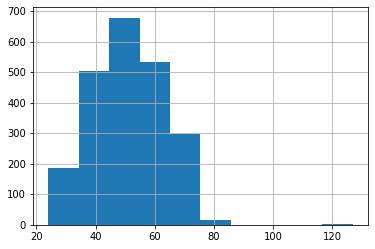

In [16]:
# Obtém a data e hora atual
data_hora_atual = datetime.datetime.now()

# Adicionar uma coluna Age no dataset
df_full_tratado['Age'] =  data_hora_atual.year - df_full_tratado['Year_Birth'] 

# Vamos observar a Distribuição das idades para criar algumas faixas 
df_full_tratado['Age'].hist();

In [17]:
# Vamos identifica as idades "inválidas". Para este estudo vamos consider que qualquer idade acima de 80 anos é inválida.
df_full_tratado[df_full_tratado['Age'] > 80]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age
192   7829        1900  2n Cycle       Divorced  36640.0        1         0  2013-09-26       99        15          6                8                7                 4            25                  1                2                    1                  2                  5             0             0             0             0             0         1         0  120
239  11004        1893  2n Cycle         Single  60182.0        0         1  2014-05-17       23         8          0                5                7                 0             2                  1                1                    0                  2                  4             0             0             0             0             0         0         0  127
339   1150        1899       PhD       Together  83532.0        0         0  2013-09-26       36       755        144              562              104                64           224                  1                4                    6                  4                  1             0             0             1             0             0         0         0  121

In [18]:
# Vamos remover os registros com idades superior a 80 anos.
df_full_tratado = df_full_tratado[df_full_tratado['Age'] <= 80]
df_full_tratado.shape

(2213, 28)

In [19]:
# Vamos adicionar uma coluna de faixas etárias
df_full_tratado['Age_Group'] = np.where(df_full_tratado.Age<30,        '20-29', 
         np.where((df_full_tratado.Age>29) & (df_full_tratado.Age<39) ,'30-39', 
         np.where((df_full_tratado.Age>39) & (df_full_tratado.Age<49) ,'40-59',          
         np.where((df_full_tratado.Age>49) & (df_full_tratado.Age<59) ,'50-59',                            
         np.where((df_full_tratado.Age>59) & (df_full_tratado.Age<69) ,'60-69',               
                                                       '>69')))))

# Adciona a lista de atributos categóricos.
atributos_categoricos.append('Age_Group')

df_full_tratado.shape

(2213, 29)

## Análise dos atributos Categóricos
- Nessa etapa vamos realizar alguma análises dos atributos Categóricos

In [20]:
# Cria o método para ajudar a analisar os atributos categóricos do dataframe.
# Isso vai nos ajudar a observar como está a correlação dos atributos com o atributo alvo (target)
def desc_atributos_categoricos(df, atributos_categ, atributo_target, perc_obs_min):
    col_agg = []
    total_linhas = list(df.shape)[0]
    dfm = None       
    
    for atrib in atributos_categ:
        col_agg.append(df.groupby([atrib]).agg({atributo_target : ['count', 'mean', 'std']})) 
        dfm = pd.concat(col_agg, keys=atributos_categ)           
        perc_obs = dfm.iloc[:,0]/total_linhas
        dfm = pd.DataFrame({'Observações' : dfm.iloc[:,0], 
                            'Capacidade de Discriminação' : dfm.iloc[:,1],
                            'Desvio Padrão': dfm.iloc[:,2],  
                            '% Observações' : perc_obs , 
                            '% Obs Maior que {0}%?'.format(str(round(perc_obs_min*100))): perc_obs > perc_obs_min} 
                          )  

    return dfm

In [21]:
# Vamos definir o número mínimo de observações em pelo menos 2% (valor empírico).
df_info_categ= desc_atributos_categoricos(df_full_tratado, atributos_categoricos, "Response", 0.02)

In [22]:
# Destaca os atributos com a Capacidade de Discriminação inferior a 15% e número de observações menor que 2% (valores empíricos).
df_info_categ.style.applymap(lambda x: 'background-color: bisque' if x < 0.15 else 'None', subset=['Capacidade de Discriminação'])\
                   .applymap(lambda x: 'background-color: bisque' if x < 0.02 else 'None' , subset=['% Observações', '% Obs Maior que 2%?'])


# Nessa visualização podemos observar algumas coisas interessantes:
# 1 - Não temos nenhum atributo que se destaque em relação aos outros pela alta Capacidade de Discriminação nem pelo % Observações;
# 2 - Podemos observar que temos alguns atributos com Capacidade de Discriminação e % Observações muito baixos;
# 3 - Também que podemos identificar alguns atributos que podem ser agrupados, aumentando assim a Capacidade de Discriminação e o % Observações

In [23]:
# Vamos agrupar os atributos Teenhome e Kidhome em um novo
df_full_tratado['NumOffSprings'] = df_full['Kidhome'] +  df_full['Teenhome']

df_full_tratado['NumOffSprings'] = df_full_tratado['NumOffSprings'].astype('category')

atributos_categoricos.append('NumOffSprings')

In [24]:
df_full_tratado[(df_full_tratado['Marital_Status'] == 'Absurd') | (df_full_tratado['Marital_Status'] == 'YOLO')]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age Age_Group NumOffSprings
2093   7734        1993  Graduation         Absurd  79244.0        0         0  2012-12-19       58       471        102              125              212                61           245                  1                4                   10                  7                  1             0             0             1             1             0         0         1   27     20-29             0
2134   4369        1957      Master         Absurd  65487.0        0         0  2014-01-10       48       240         67              500              199                 0           163                  3                3                    5                  6                  2             0             0             0             0             0         0         0   63     60-69             0
2177    492        1973         PhD           YOLO  48432.0        0         1  2012-10-18        3       322          3               50                4                 3            42                  5                7                    1                  6                  8             0             0             0             0             0         0         0   47     40-59             1
2202  11133        1973         PhD           YOLO  48432.0        0         1  2012-10-18        3       322          3               50                4                 3            42                  5                7                    1                  6                  8             0             0             0             0             0         0         1   47     40-59             1

In [25]:
# Vamos remover os registros com estado civil incomuns
df_full_tratado = df_full_tratado[(df_full_tratado['Marital_Status'] != 'Absurd') | (df_full_tratado['Marital_Status'] != 'YOLO')]
df_full_tratado.shape

(2213, 30)

In [26]:
# Vamos Converter os atributos catgóricos para o tipo category
for c in atributos_categoricos:
    df_full_tratado[c] = df_full_tratado[c].astype('category')  

In [27]:
# Vamos criar um dataframe transformando os valores categóricos em valores inteiros para observar a correlação.
df_categ_code = pd.DataFrame()

for c in df_full_tratado[atributos_categoricos].columns:
    df_categ_code[c] =  df_full_tratado[c].cat.codes

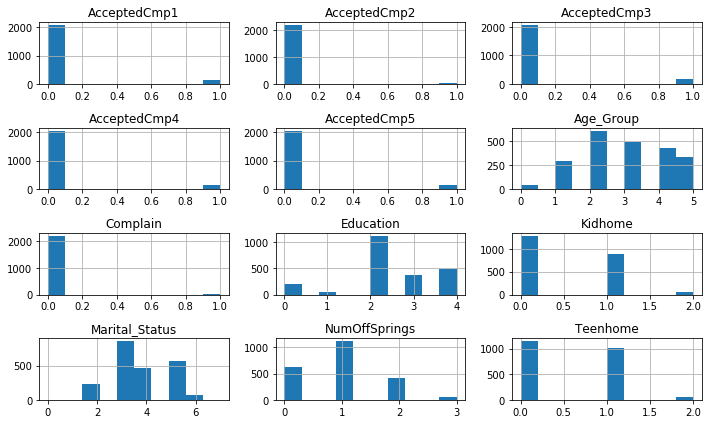

In [28]:
# Distribuição dos atributos catégoricos do dataset
df_categ_code.hist(figsize=(10,6))
plt.tight_layout()
plt.show()

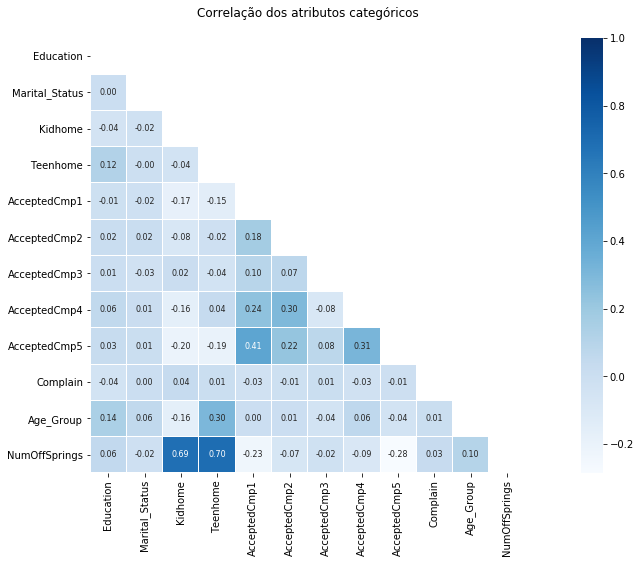

In [29]:
# Plota o gráfico de correlação dos dados categóricos.
df_categ_corr = df_categ_code.astype(float).corr()

plt.figure(figsize=(20,8))
mask = np.triu(np.ones_like(df_categ_corr, dtype=np.bool))
ax1 = sns.heatmap(df_categ_corr,linewidths=0.1,vmax=1.0, square=True, annot=True, fmt='.2f', annot_kws={"size": 8} , cmap=matplotlib.cm.Blues, mask=mask)
plt.title('Correlação dos atributos categóricos\n')
plt.show()

In [30]:
# Adiciona o atributo Target ao dataframe dos valores categóricos codificados
df_categ_code["Response"] = df_full_tratado["Response"]

In [31]:
# Cria uma função para plotar grafico Violino.
def plota_grafico_violino(df, atributos, atributo_target, titulo_grafico, plot_linhas=3, plot_colunas = 5):
    
    sns.set_style("whitegrid")          
    fig = plt.figure(figsize=(20,9))
    fig.subplots_adjust(hspace=0.3, wspace=0.4)
    contador=1
        
    atributos_cop = atributos.copy()
    
    if(atributo_target in atributos_cop):      
        atributos_cop.remove(atributo_target)
        
    total_plots = min(plot_linhas* plot_colunas, len(atributos_cop))   
    
    for atributo in atributos_cop:
        sns.violinplot(data = df, y = atributo, x = atributo_target)
        ax=sns.violinplot(data = df, y = atributo, x = atributo_target)
                
        if contador<total_plots:
            plt.subplot(plot_linhas, plot_colunas, contador)
            contador+=1
        
        fig.suptitle(titulo_grafico,  y=0.95, fontsize=14, fontweight='bold')



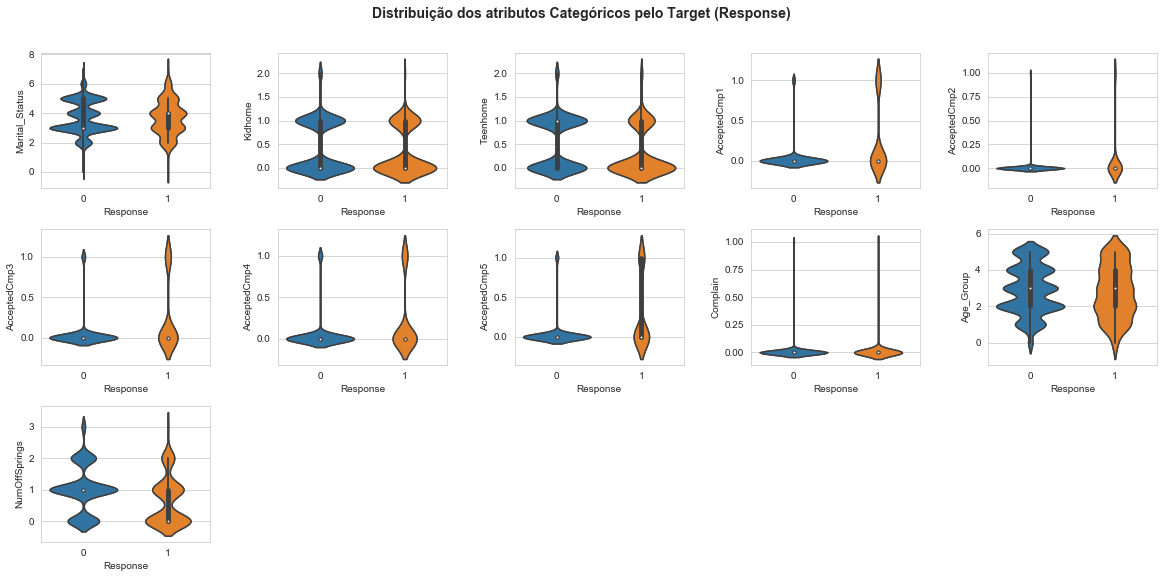

In [32]:
# Plota a distribuição dos atributos Categóricos pelo atributo Target (Response)
plota_grafico_violino(df_categ_code, atributos_categoricos, "Response", 'Distribuição dos atributos Categóricos pelo Target (Response)')

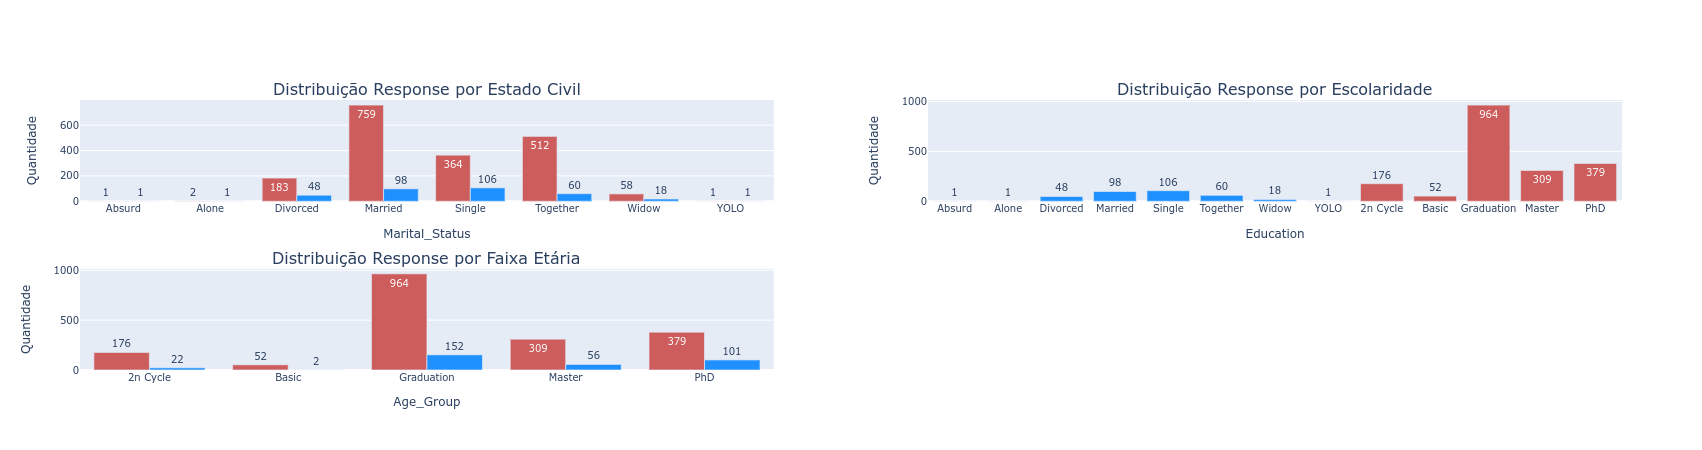

In [33]:
atributos_categoria = ['Marital_Status', 'Education', 'Age_Group']
df = df_full_tratado
traces = []

linhas_plot = 2
colunas_plot = 2 
fig = make_subplots(rows=linhas_plot, cols=colunas_plot,  vertical_spacing = 0.25, subplot_titles=('Distribuição Response por Estado Civil', 'Distribuição Response por Escolaridade', 'Distribuição Response por Faixa Etária'))

for atributo in atributos_categoria:
    dados =          df.groupby([atributo, 'Response'], as_index = False).agg({'ID': 'count'})
    categoria =      dados[atributo].unique()
    dados_classe_0 = dados[dados.Response == 0]['ID']
    dados_classe_1 = dados[dados.Response == 1]['ID']
    
    traces.append( go.Bar(x=categoria, y=dados_classe_0,  name='Response 0',  showlegend=False, text=dados_classe_0 , textposition = 'auto', marker_color='indianred' ))
    traces.append( go.Bar(x=categoria, y=dados_classe_1,  name='Response 1',  showlegend=False, text=dados_classe_1 , textposition = 'auto', marker_color='dodgerblue' ))
  

count = 0
for i in range(linhas_plot):
    for j in range(colunas_plot):  
        if count >= len(atributos_categoria):
            break;
        
        linha = i+1
        coluna = j+1         
        
        fig.append_trace(traces[count], row=linha, col=coluna)  
        fig.append_trace(traces[count+1], row=linha, col=coluna) 
        fig.update_xaxes(row=linha, col=coluna, title_text=atributos_categoria[count])
               
        count +=1   

fig.update_yaxes(title_text='Quantidade')
fig.update_layout(font=dict( size=10))
        
fig.show()

### Análise dos atributos Numéricos

In [34]:
# Plota as variáveis núméricas.
atributos_numericos

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [35]:
# Observando algumas medidas
df_full_tratado[atributos_numericos].describe().transpose()

count          mean           std     min      25%      50%      75%       max
Income               2213.0  52236.581563  25178.603047  1730.0  35246.0  51373.0  68487.0  666666.0
Recency              2213.0     49.007682     28.941864     0.0     24.0     49.0     74.0      99.0
MntWines             2213.0    305.153638    337.305490     0.0     24.0    175.0    505.0    1493.0
MntFruits            2213.0     26.323995     39.735932     0.0      2.0      8.0     33.0     199.0
MntMeatProducts      2213.0    166.962494    224.226178     0.0     16.0     68.0    232.0    1725.0
MntFishProducts      2213.0     37.635337     54.763278     0.0      3.0     12.0     50.0     259.0
MntSweetProducts     2213.0     27.034794     41.085433     0.0      1.0      8.0     33.0     262.0
MntGoldProds         2213.0     43.911432     51.699746     0.0      9.0     24.0     56.0     321.0
NumDealsPurchases    2213.0      2.325350      1.924402     0.0      1.0      2.0      3.0      15.0
NumWebPurchases      2213.0      4.087664      2.741664     0.0      2.0      4.0      6.0      27.0
NumCatalogPurchases  2213.0      2.671487      2.927096     0.0      0.0      2.0      4.0      28.0
NumStorePurchases    2213.0      5.805242      3.250752     0.0      3.0      5.0      8.0      13.0
NumWebVisitsMonth    2213.0      5.321735      2.425092     0.0      3.0      6.0      7.0      20.0

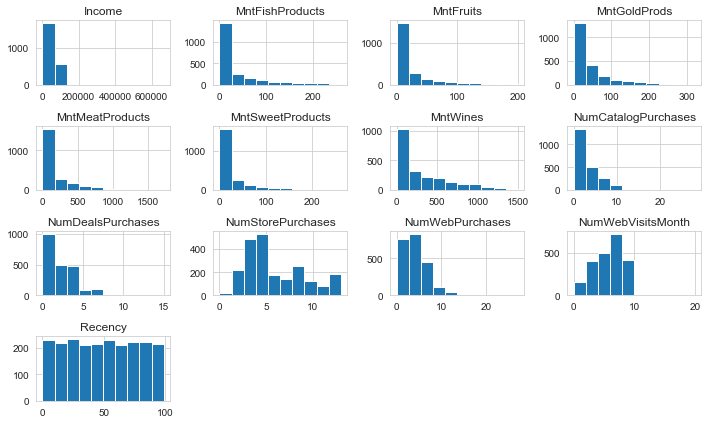

In [36]:
# Distribuição dos atributos nuéricos do dataset
df_full_tratado[atributos_numericos].hist(figsize=(10,6))
plt.tight_layout()
plt.show()

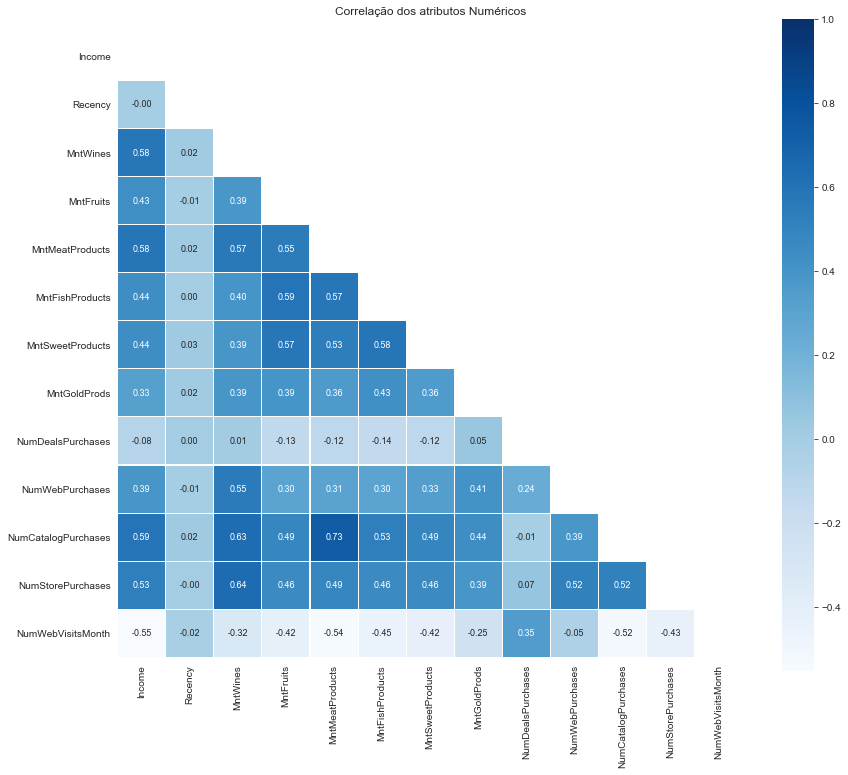

In [37]:
# Plota o gráfico de correlação dos dados Numericos.
df_num_corr = df_full_tratado[atributos_numericos].corr()

plt.figure(figsize=(14,12))
mask = np.triu(np.ones_like(df_num_corr, dtype=np.bool))
ax1 = sns.heatmap(df_num_corr,linewidths=0.1,vmax=1, square=True, annot=True, fmt='.2f', annot_kws={"size": 9} , cmap=matplotlib.cm.Blues, mask=mask)
plt.title('Correlação dos atributos Numéricos\n')
plt.show()

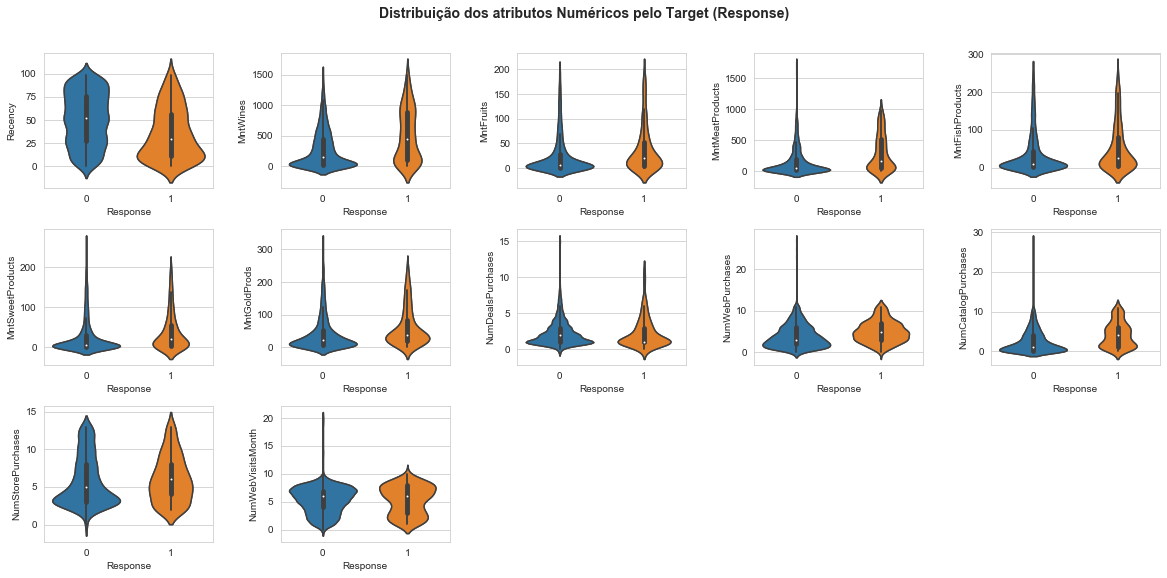

In [38]:
# Plota a distribuição dos atributos Numéricos pelo atributo Target (Response)
plota_grafico_violino(df_full_tratado, atributos_numericos, "Response", 'Distribuição dos atributos Numéricos pelo Target (Response)')

### Verificando e Tratando Outliers
- Nesta etapa vamos verificar a tratar os outliers

In [39]:
# Função para plotar graficos BoxPlot
def plota_graficos_boxplot(df, lista_atributos, linhas_plot = 5, colunas_plot = 3):
    traces = []

    fig = make_subplots(rows=linhas_plot, cols=colunas_plot)

    for atributo in lista_atributos:
        traces.append(go.Box(y=df[atributo] , name = atributo))  


    count = 0
    for i in range(linhas_plot):
        for j in range(colunas_plot):  
            if count >= len(lista_atributos):
                break;

            linha = i+1
            coluna = j+1         

            fig.append_trace(traces[count], row=linha, col=coluna)  

            count +=1      

    fig.update_layout(title = "Distribuição das Variáveis Numéricas - Verificação de Outliers", title_x=0.5, font=dict( size=10), showlegend = False, height = 1200 )


    fig.show()

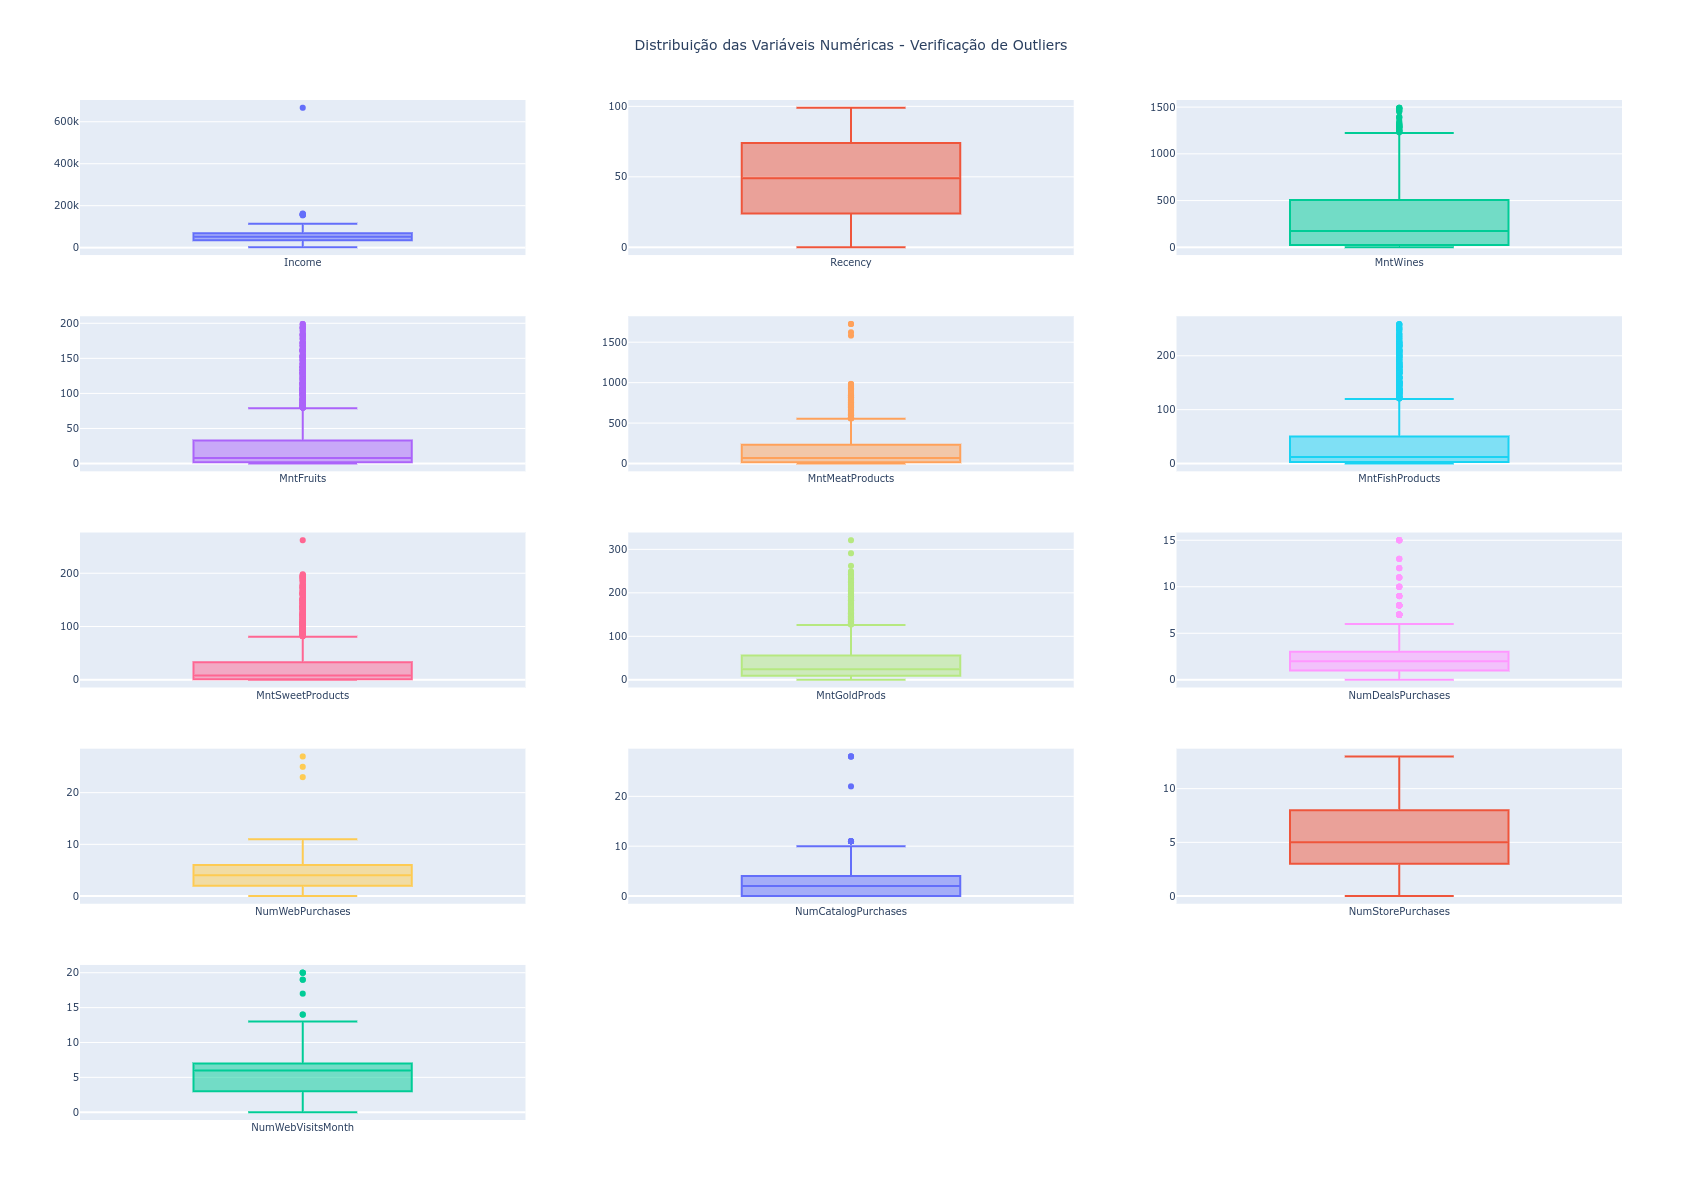

In [40]:
# Vamos plotar os dados dos atributos numéricos para verificarmos os dados e indenticar outliers
plota_graficos_boxplot(df_full_tratado, atributos_numericos)

In [41]:
# Verificando outliers com a função Z-Score
#"O escore Z é o número sinalizado de desvios padrão pelo qual o valor de uma observação ou ponto de dados está acima do valor médio do que está sendo observado ou medido."
from scipy import stats

# Vamos definir a função que vai substituir os valores considerados outilier por NA.
def substituir_outliers_na(df, coluna, threshold = 2):
    # threshold = valor mínino de 02 desvios padrão para ser não ser considerado outlier.
    df[coluna] = np.where(np.abs(stats.zscore(df[coluna].values)) > threshold, np.nan, df[coluna])    

In [42]:
# Identificando os outliers de cada um dos atibutos e substituíndo por NA.
# É importante destacar que nem todo valor indentificado como oulier é um registro errado. Mas como ele difere muito da média dos demais, a gente precisa tratar para evitar distorções no modelo.
# Existem diversas maneiras de tratamento de outiliers, por exemplo: excluir, preencher com a média, tratar separado, transformação logaritmica, utilizar métodos de clusterização e etc..
# Neste estudo estaremos removendo os registros onde o valor superior a 2 devios padrão da média.
for atributo in df_full_tratado[atributos_numericos].columns: 
    substituir_outliers_na(df_full_tratado, atributo)

In [43]:
df_full_tratado.isna().sum()

ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                  12
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines               127
MntFruits              152
MntMeatProducts        135
MntFishProducts        160
MntSweetProducts       148
MntGoldProds           145
NumDealsPurchases       84
NumWebPurchases         90
NumCatalogPurchases    112
NumStorePurchases       83
NumWebVisitsMonth       19
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Response                 0
Age                      0
Age_Group                0
NumOffSprings            0
dtype: int64

In [44]:
# Salva do Dataframe em CSV
df_full_tratado.to_csv('df_outliers.csv', index=False, sep=';', encoding='utf-8-sig')

In [45]:
# Vamos remover os registros com NA.
df_full_tratado.dropna(inplace=True);
df_full_tratado.shape

(1510, 30)

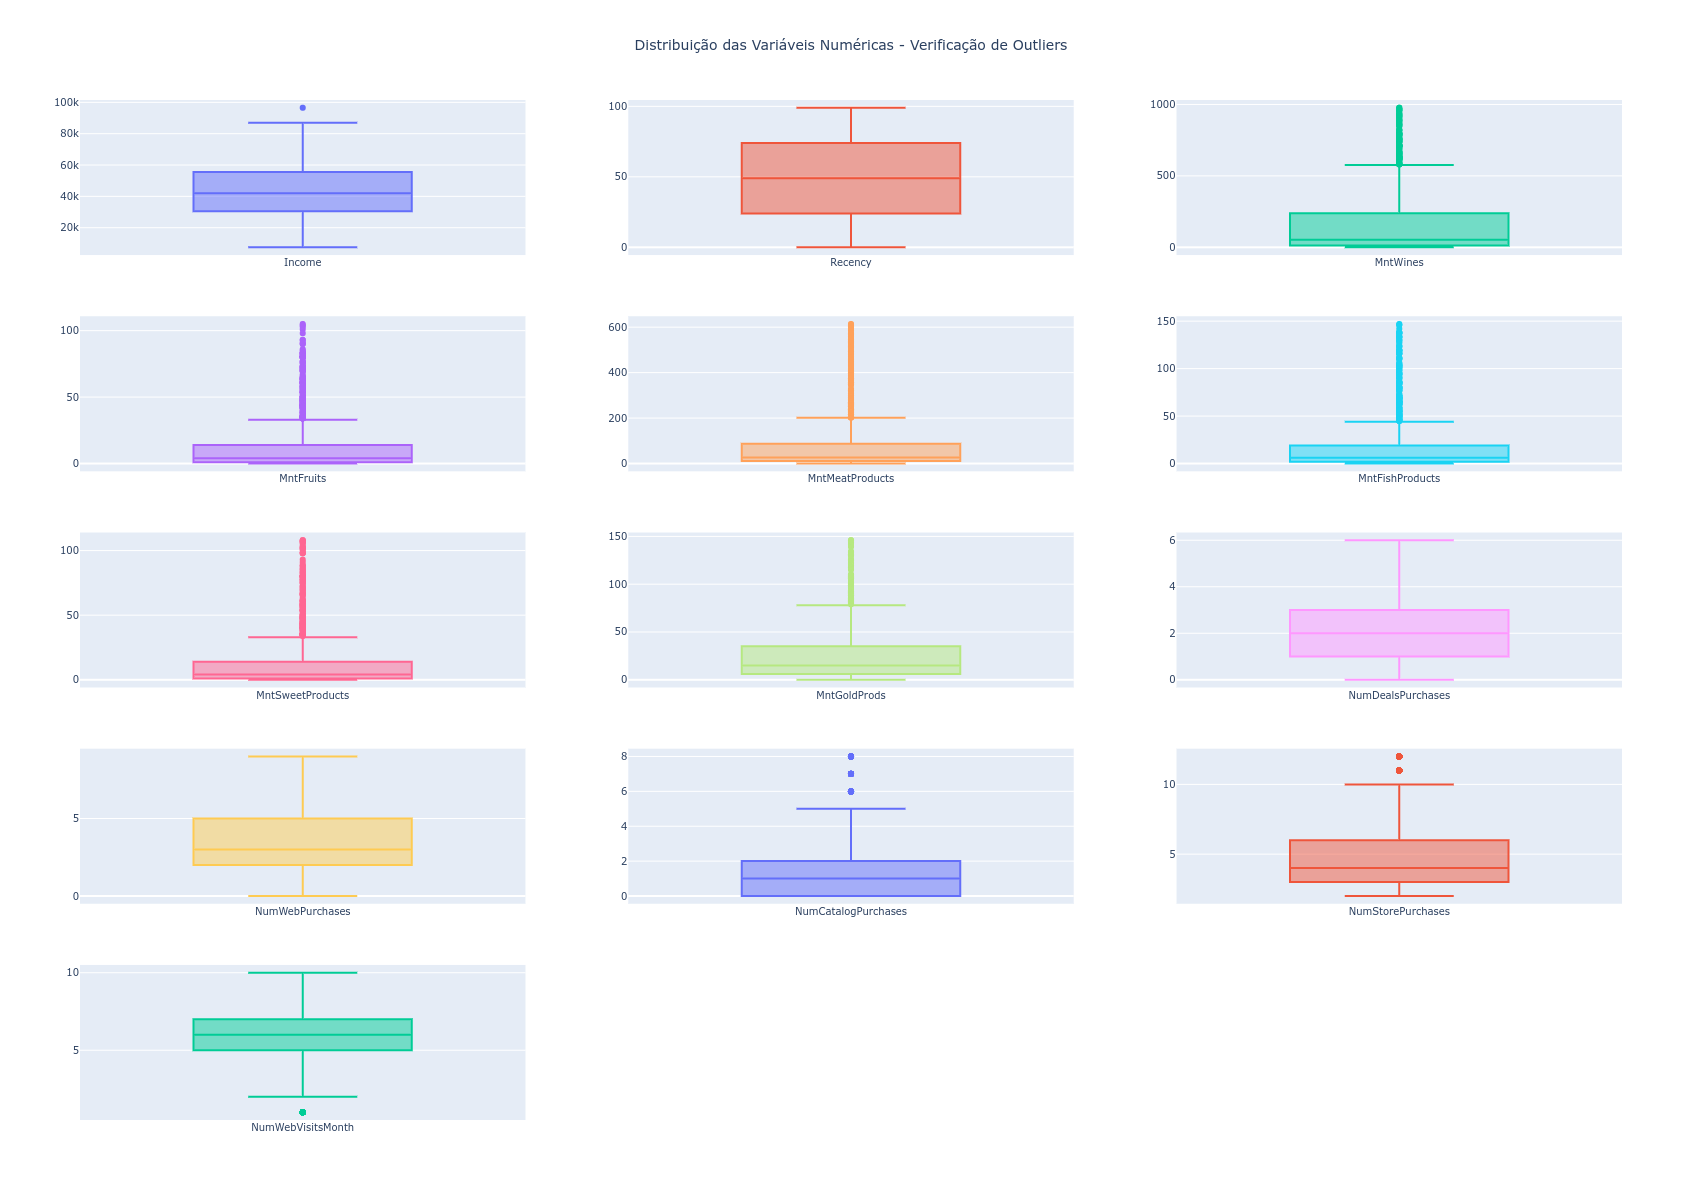

In [46]:
# Vamos plotar os dados apás o tratamento dos Outliers.
plota_graficos_boxplot(df_full_tratado, atributos_numericos)

# Análise RFM - Recência (R), Frequência (F), Monetaridade (M).

- Nesta etapa vamos realizar um breve análise RFM. 
- RFM é um método utilizado para analisar o comportamento do cliente e definir segmentos de mercado. É comumente utilizada em database marketing e marketing direto e tem recebido atenção especial no varejo (wikipedia).
- Essa técnica tem como objetivo classificar os clientes por meio de pontuações nos três principais pilares que nomeiam o método: quando foi sua última compra, quantas vezes ele já comprou e quanto já gastou com na empresa.


- Essa técnica pode nos ajudar a responder as seguintes perguntas:
  - Quais são os melhores clientes?
  - Quais clientes tem mais potencial para ser fidelizado?
  - Quais clientes tem mais chances de não comprar mais meus produtos?
  - Quais clientes possuem mais chances de responder a uma campanha de Marketing?


In [47]:
# Soma o valor gasto com todos os tipos de produto.
df_full_tratado['MntTotal'] = df_full_tratado['MntWines'] + df_full_tratado['MntFruits']  +  df_full_tratado['MntMeatProducts']  +  df_full_tratado['MntFishProducts']  +  df_full_tratado['MntSweetProducts']  +  df_full_tratado['MntGoldProds']  

# Soma a quantidade de todos os tipos de produto.
df_full_tratado['NumTotal'] = df_full_tratado['NumDealsPurchases'] + df_full_tratado['NumWebPurchases']  +  df_full_tratado['NumCatalogPurchases']  +  df_full_tratado['NumStorePurchases']  

# Soma o total de campanhas aceitas
df_full_tratado['TotalAcceptedCmp'] = df_full_tratado['AcceptedCmp1'].astype(int) + df_full_tratado['AcceptedCmp2'].astype(int)  +  df_full_tratado['AcceptedCmp3'].astype(int)  +  df_full_tratado['AcceptedCmp4'].astype(int)  +  df_full_tratado['AcceptedCmp5'].astype(int) 



In [48]:
# Calcula a proporçao dos montantes
cols_mnt = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']

for col in cols_mnt:
    col_name= 'Prop' + col[3:len(col)]
    df_full_tratado[col_name] = df_full_tratado[col] / df_full_tratado['MntTotal']

In [49]:
# Calcula a proporçao das qauntidades
cols_num = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

for col in cols_mnt:
    col_name= 'Prop' + col[3:len(col)]
    df_full_tratado[col_name] = df_full_tratado[col] / df_full_tratado['NumTotal']

In [50]:
df_full_tratado.head()

ID  Year_Birth   Education Marital_Status   Income Kidhome Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth AcceptedCmp3 AcceptedCmp4 AcceptedCmp5 AcceptedCmp1 AcceptedCmp2 Complain  Response  Age Age_Group NumOffSprings  MntTotal  NumTotal  TotalAcceptedCmp  PropWines  PropFruits  PropMeatProducts  PropFishProducts  PropSweetProducts  PropGoldProds
1  2174        1954  Graduation         Single  46344.0       1        1  2014-03-08     38.0      11.0        1.0              6.0              2.0               1.0           6.0                2.0              1.0                  1.0                2.0                5.0            0            0            0            0            0        0         0   66     60-69             2      27.0       6.0                 0   1.833333    0.166667          1.000000          0.333333           0.166667       1.000000
2  4141        1965  Graduation       Together  71613.0       0        0  2013-08-21     26.0     426.0       49.0            127.0            111.0              21.0          42.0                1.0              8.0                  2.0               10.0                4.0            0            0            0            0            0        0         0   55     50-59             0     776.0      21.0                 0  20.285714    2.333333          6.047619          5.285714           1.000000       2.000000
3  6182        1984  Graduation       Together  26646.0       1        0  2014-02-10     26.0      11.0        4.0             20.0             10.0               3.0           5.0                2.0              2.0                  0.0                4.0                6.0            0            0            0            0            0        0         0   36     30-39             1      53.0       8.0                 0   1.375000    0.500000          2.500000          1.250000           0.375000       0.625000
4  5324        1981         PhD        Married  58293.0       1        0  2014-01-19     94.0     173.0       43.0            118.0             46.0              27.0          15.0                5.0              5.0                  3.0                6.0                5.0            0            0            0            0            0        0         0   39       >69             1     422.0      19.0                 0   9.105263    2.263158          6.210526          2.421053           1.421053       0.789474
5  7446        1967      Master       Together  62513.0       0        1  2013-09-09     16.0     520.0       42.0             98.0              0.0              42.0          14.0                2.0              6.0                  4.0               10.0                6.0            0            0            0            0            0        0         0   53     50-59             1     716.0      22.0                 0  23.636364    1.909091          4.454545          0.000000           1.909091       0.636364

In [51]:
# Cria o dataframe RFM - Recência (R), Frequência (F), Monetaridade (M).
df_RFM = pd.DataFrame()
df_RFM ['ID']  = df_full_tratado['ID']
df_RFM ['Recency']  = df_full_tratado['Recency']
df_RFM ['Frequency']= df_full_tratado['NumTotal']
df_RFM ['Monetary'] = df_full_tratado['MntTotal']


Distribuição das varíaveis RFM - Recência (R), Frequência (F), Monetaridade (M).


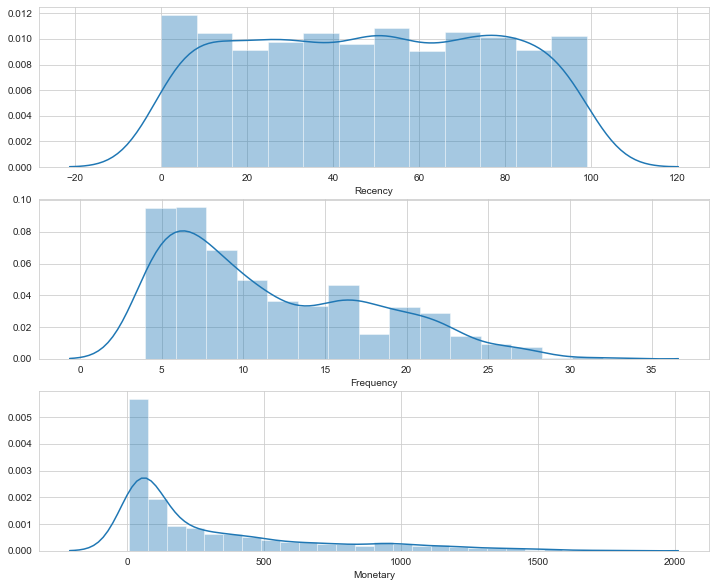

In [52]:
#  Distribuição das varíaveis RFM - Recência (R), Frequência (F), Monetaridade (M).
print('\nDistribuição das varíaveis RFM - Recência (R), Frequência (F), Monetaridade (M).')
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(df_RFM['Recency'])
plt.subplot(3, 1, 2); sns.distplot(df_RFM['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(df_RFM['Monetary'])

plt.show()

In [53]:
# Criando os quintis onde cada um contém 20% dos registros (população).
quintis = df_RFM[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintis

{'Recency': {0.2: 19.0, 0.4: 39.0, 0.6: 58.0, 0.8: 79.0},
 'Frequency': {0.2: 6.0, 0.4: 8.0, 0.6: 12.0, 0.8: 18.0},
 'Monetary': {0.2: 43.0,
  0.4: 78.60000000000002,
  0.6: 228.5999999999999,
  0.8: 564.0}}

In [54]:
# Cria o método para atribuir uma classificão a recência de 1 a 5 (Quanto menor melhor).
def r_score(x):
    if x <= quintis['Recency'][.2]:
        return 5
    elif x <= quintis['Recency'][.4]:
        return 4
    elif x <= quintis['Recency'][.6]:
        return 3
    elif x <= quintis['Recency'][.8]:
        return 2
    else:
        return 1
    
# Cria o método para atribuir uma classificão a Frquencia e Monetaridade de 1 a 5 (Quanto maior melhor).
def fm_score(x, c):
    if x <= quintis[c][.2]:
        return 1
    elif x <= quintis[c][.4]:
        return 2
    elif x <= quintis[c][.6]:
        return 3
    elif x <= quintis[c][.8]:
        return 4
    else:
        return 5    

In [55]:
# Calcula os Scores do RFM e adiciona no dataframe
df_RFM['R'] = df_RFM['Recency'].apply(lambda x: r_score(x))
df_RFM['F'] = df_RFM['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
df_RFM['M'] = df_RFM['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))
df_RFM['RFM_Concat'] = df_RFM['R'].map(str) + df_RFM['F'].map(str) + df_RFM['M'].map(str)

df_RFM.head()

ID  Recency  Frequency  Monetary  R  F  M RFM_Concat  RFM_Score
1  2174     38.0        6.0      27.0  4  1  1        411          6
2  4141     26.0       21.0     776.0  4  5  5        455         14
3  6182     26.0        8.0      53.0  4  2  2        422          8
4  5324     94.0       19.0     422.0  1  5  4        154         10
5  7446     16.0       22.0     716.0  5  5  5        555         15

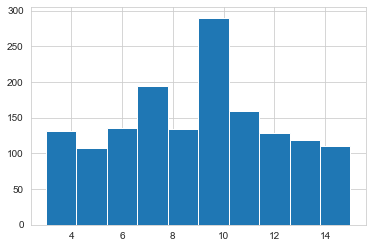

In [57]:
# Vamos ver a distribuiçao do RFM Score
df_RFM['RFM_Score'].hist();

#### Definir as Categorias (Segmentos) RFM

Na análise RFM há diferentes tipos de segmentação. Neste estudo vamos utilizar onze segmentos já bastante conhecidos na literatura. 
A terminologia aqui utilizada é uma tradução livre do inglês. (https://blog.analystats.com/pt/2019/03/21/segmenta%C3%A7%C3%A3o-de-clientes-uma-an%C3%A1lise-rfm-em-knime/)

Abaixo estão os segmentos de RFM e seu significado que definimos para essa análise.



- 1	-	Campeões	-	Compraram recentemente, compram com frequência e gastam muito
-	2	-	Fiéis	-	Gastam muito e respondem a promoções
-	3	-	Potencialmente fiéis	-	Compraram recentemente, mais de uma vez e gastaram uma boa quantia
-	4	-	Novos clientes	-	Compraram recentemente, mas não compram com frequência
-	5	-	Promissores	-	Compraram recentemente, mas não gastaram muito
-	6	-	Precisam de atenção	-	Recência, frequência e valor monetário acima da média
-	7	-	Quase em risco	-	Recência, frequência e valor monetário abaixo da média
-	8	-	Em risco	-	Gastaram muito, compraram muitas vezes, mas há muito tempo
-	9	-	Não posso perdê-los	-	Compraram muito e com frequência, mas há muito tempo
-	10	-	Hibernando	-	Compraram pouco, com baixa frequência e há muito tempo
-	11	-	Perdidos	-	Recência, frequência e valores monetários baixos


In [102]:
# Cria o método para atribuir o RFM_Score um segmento. OBS: Os segmentos abaixos foram baseados nos mais comuns utilizados.
def rfm_level(df):
    if ((df.R >= 4) and (df.F >= 4) and ( df.M >= 4 )):
        return  'Campeões'  
    
    elif ((df.R >= 2) and (df.F >= 3) and ( df.M >= 3 )):
        return 'Fiéis'
    
    elif ((df.R >= 3) and (df.F >= 1 and df.F <= 3) and ( df.M >= 1 and df.M <= 3)):
        return 'Potencialmente fiéis'
 
    elif ((df.R >= 4) and (df.F <= 1) and ( df.M <= 1 )):
        return 'Novos clientes'
    
    elif ((df.R >= 3 and df.R <= 4) and (df.F <= 1) and ( df.M <= 1 )):
        return 'Promissores'
    
    elif ((df.R >= 2 and df.R <= 3) and (df.F >= 2 and df.F <= 3) and ( df.M >= 2 and df.M <= 3)):
        return 'Precisam de atenção'
    
    elif ((df.R >= 2 and df.R <= 3) and (df.F <= 2) and ( df.M <= 2)):
        return 'Quase em risco'

    elif ((df.R <= 2) and (df.F >= 2) and (df.M >= 2)):
        return 'Em Risco'
    
    elif ((df.R <= 1) and (df.F >= 4) and ( df.M >= 4)):
        return 'Não posso perdê-los'
    
    elif ((df.R <= 2) and (df.F <= 2) and ( df.M <= 2)):
        return 'Hibernando'   
    
    else:
        return 'Perdidos'

In [103]:
df_RFM['RFM_Segment'] = df_RFM.apply(rfm_level, axis=1)


In [104]:
# Exibe os 10 melhores clientes de acordo com RFM
print('Top 10 melhores clientes de acordo com RFM')
df_RFM.sort_values(by = ['RFM_Score','Monetary'] , ascending=False).head(10)

Top 10 melhores clientes de acordo com RFM


ID  Recency  Frequency  Monetary  R  F  M RFM_Concat  RFM_Score RFM_Segment RFM_Level
338   9560     18.0       22.0    1674.0  5  5  5        555         15    Campeões   Campeão
1354  2407     10.0       20.0    1555.0  5  5  5        555         15    Campeões   Campeão
1864  9064     10.0       20.0    1555.0  5  5  5        555         15    Campeões   Campeão
1498  9463     16.0       25.0    1443.0  5  5  5        555         15    Campeões   Campeão
60    6853     12.0       21.0    1438.0  5  5  5        555         15    Campeões   Campeão
2221  7366     12.0       21.0    1438.0  5  5  5        555         15    Campeões   Campeão
417   5067     11.0       21.0    1378.0  5  5  5        555         15    Campeões   Campeão
2128  1631      3.0       23.0    1282.0  5  5  5        555         15    Campeões   Campeão
889   2930      7.0       20.0    1281.0  5  5  5        555         15    Campeões   Campeão
2049  2079      0.0       22.0    1208.0  5  5  5        555         15    Campeões   Campeão

In [ ]:
# Exibe os 10 piores clientes de acordo com RFM
print('Top 10 piores clientes de acordo com RFM')
df_RFM.sort_values(by = ['RFM_Score','Monetary'] , ascending=True).head(10)

In [ ]:
# Agrupando os Segmentos RFM pela média e quantidade.
df_RFM_Level_AGG = df_RFM.groupby('RFM_Level').agg({'Recency': 'mean','Frequency': 'mean', 'Monetary': ['mean', 'count'], 'RFM_Score': 'max'}).round(2)
df_RFM_Level_AGG

In [ ]:
#Prepara o dataframe para melhor exibição
df_RFM_Level_AGG.columns = df_RFM_Level_AGG.columns.droplevel()
df_RFM_Level_AGG.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count', 'RFM_Score']
df_RFM_Level_AGG.reset_index(inplace=True)
df_RFM_Level_AGG.sort_values(by = 'RFM_Score', inplace=True)
df_RFM_Level_AGG

In [ ]:
# Plota o grafico dos segmentos RFM

labels = df_RFM_Level_AGG.RFM_Level+ ' (Score: ' +  df_RFM_Level_AGG.RFM_Score.map(str) +  ')\nR: ' +  df_RFM_Level_AGG.RecencyMean.map(str) + '\nF: ' + df_RFM_Level_AGG.FrequencyMean.map(str) + '\nM: ' + df_RFM_Level_AGG.MonetaryMean.map(str) + ' \nQty: ' +  df_RFM_Level_AGG.Count.map(str)

size = df_RFM_Level_AGG.Count

color_values =sorted( df_RFM_Level_AGG.RFM_Score.values, reverse=True)

cmap = matplotlib.cm.Blues
mini=min(color_values)
maxi=max(color_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value*1.5)) for value in color_values]

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(18, 8)
squarify.plot(sizes=size, 
              label=labels, 
              alpha=.8, 
              color=colors                    
             )
plt.title("\nSegmentos RFM\n",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [ ]:
df_full_tratado.shape

In [ ]:
df_RFM.shape

In [ ]:
# Adiciona os dados de RFM no dataframe tratado.
df_full_tratado['RFM_Score'] = df_RFM['RFM_Score']
df_full_tratado['RFM_Level'] = df_RFM['RFM_Level']

# Análise de Agrupamento (cluster)

- Nesta etapa vamos realizar um breve análise de como os clientes estão agrupados. 

In [ ]:
df_RFM.describe()

In [ ]:
# Seleciona os atributos previsores
atributos_previsores = df_RFM.iloc[:, 1:4]
atributos_previsores.shape

In [ ]:
#  Distribuição das varíaveis RFM - Recência (R), Frequência (F), Monetaridade (M).
print('\nDistribuição das varíaveis RFM - Recência (R), Frequência (F), Monetaridade (M)\n')
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(atributos_previsores['Recency'])
plt.subplot(3, 1, 2); sns.distplot(atributos_previsores['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(atributos_previsores['Monetary'])
plt.show()

In [ ]:
# Tratar os valores zeros antes da tranformação de Log
atributos_previsores['Recency']   =  atributos_previsores['Recency'] + 0.0000000001
atributos_previsores['Frequency'] =  atributos_previsores['Frequency'] + 0.0000000001
atributos_previsores['Monetary']  =  atributos_previsores['Monetary'] + 0.0000000001

In [ ]:
# Aplica a tranformação de Log para deixar os dados mais próximo da distribuição normal.
# Com isso vamos suavizar a diferença entre os valores extremos e os demais:
atributos_previsores_log =  atributos_previsores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

#  Distribuição das varíaveis RFM - Recência (R), Frequência (F), Monetaridade (M) após a tranformação de Log.
print('\nDistribuição das varíaveis RFM - Recência (R), Frequência (F), Monetaridade (M) após a tranformação de Log.\n')
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(atributos_previsores_log['Recency'])
plt.subplot(3, 1, 2); sns.distplot(atributos_previsores_log['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(atributos_previsores_log['Monetary'])
plt.show()

In [ ]:
# StandardScaler para colocar todos os valores na mesma escala (escalonamento).
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
atributos_previsores_norm = scaler.fit_transform(atributos_previsores_log)
atributos_previsores_norm.shape

In [ ]:
# Verificando a quantidade de Clusters ideal para este conjunto de dados.
# Basicamente existem três formas de fazer isso:
#    1 - Conhecimento Prévio da quatidade de Clusters;
#    2 - Sem conhecimento prévio da quatidade de Clusters, podemos usar a regra geral dada pela fórmula: cluters = Raiz quadrada de N/2, onde N é quatidade de registros;
#    3 - Utilizando o Elbow Method;
# Aqui vamos usar o Elbow Method (https://en.wikipedia.org/wiki/Elbow_method_(clustering))
# Após o valor indicado pelo “cotovelo” (curva acentuada) no gráfico indica que não possui ganho em relação ao aumento de clusters.
# Nesse ponto, significa que o método encontrou o número ideal para o argumento k.
# Obs: Nenhum destes métodos garante encontrar a quantidade ideal de cluters, para isso é necessário realizar diversos testes na base de dados.
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

# Para esse estudo vamos considerar o número de Clusters igual a 4.

from sklearn.cluster import KMeans

# Within cluster sum of squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 1)
    kmeans.fit(atributos_previsores_norm)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10 ,5))
plt.plot(range(1, 11), wcss, 'o')
plt.plot(np.arange(1 , 11) , wcss , '-' , alpha = 0.5)
plt.xlabel('Clusters (k)')
plt.ylabel('Sum Squared Errors (SSE)')
plt.title('Elbow Method');

In [ ]:
# Cria a função para calcular o centroide dos clusters
def cacular_centroide(x, y):
    return (np.sum(x)/len(x), np.sum(y)/len(y))

In [ ]:
# Cria a função para Plotar os graficos dos agrupamentos
def plota_graficos_clusters(atributos, previsoes, nome_algoritmo, x_label, y_label):

    colors = ['tab:blue','tab:green','tab:red','tab:orange','tab:purple','tab:cyan','tab:olive','tab:pink','tab:gray','gold']
    markers = ['*', '^', 'X', '+', 'D', 'H', 'o', '+', 's', 'v']
    
    plt.figure(figsize=(16,6))
    plt.title('Previsões Algoritmo ' + nome_algoritmo)   

    for i in np.unique(previsoes):
        
        x = atributos[previsoes == i][x_label].values
        y = atributos[previsoes == i][y_label].values
        centroide = cacular_centroide(x,y)

        if i < 0:
            nome =  'Sem Cluster ' + str(i)
            plt.scatter(x, y, s = 50, c = 'gray', label = nome, alpha=.7)
            plt.scatter(centroide[0],  centroide[1], marker = markers[i+1], s = 100, c = 'black',  label = (nome + '-Centoide'))
        else:
            nome = 'Cluster ' + str(i+1)          
            plt.scatter(x, y, s = 50, c = colors[i], label =  nome, alpha=.7)
            plt.scatter(centroide[0],  centroide[1], marker = markers[i+1], s = 100, c = 'black', label = (nome + '-Centoide'))

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    #plt.savefig(fname=nome_algoritmo +'.png', dpi=100)
    plt.show()

In [ ]:
# Cria o modelo de agrupamgento KMeans
kmeans = KMeans(n_clusters = 4, random_state = 1)
previsoes_kmeans = kmeans.fit_predict(atributos_previsores_norm)

In [ ]:
# Adiciona a coluna com o rotulo do cluster no dataframe RFM original
df_kmeans = df_RFM.assign(Cluster = kmeans.labels_)

# Observando as Estatística descritiva dos clusters.
df_kmeans[['Recency','Frequency', 'Monetary', 'Cluster']].groupby("Cluster").describe().round(0)

In [ ]:
# Agrupa o dataframe pelos clusters
df_kmeans_AGG = df_kmeans.groupby(['Cluster']).agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': ['mean', 'count']}).round(2)
df_kmeans_AGG

In [ ]:
# Plota o grafico com os agrupamentos
plota_graficos_clusters(atributos_previsores,previsoes_kmeans, 'Kmeans', 'Recency', 'Monetary')

In [ ]:
# Plota o grafico com os agrupamentos
plota_graficos_clusters(atributos_previsores,previsoes_kmeans, 'Kmeans', 'Frequency', 'Monetary')

In [ ]:
# Plota o grafico com os agrupamentos
plota_graficos_clusters(atributos_previsores,previsoes_kmeans, 'Kmeans', 'Frequency', 'Recency')

In [ ]:
df_kmeans[['Cluster','Recency']].groupby(['Cluster']).mean()

In [ ]:
#Prepara o dataframe para melhor exibição
df_kmeans_AGG.columns = df_kmeans_AGG.columns.droplevel()
df_kmeans_AGG.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
df_kmeans_AGG.reset_index(inplace=True)
#df_kmeans_AGG.sort_values(by = 'RFM_Score', inplace=True)
df_kmeans_AGG

In [ ]:
df_kmeans_AGG

In [ ]:
# Distribuição das variáveis pr Cluster
trace1 =  go.Bar(x= df_kmeans_AGG.Cluster, y= df_kmeans_AGG.RecencyMean  , text=df_kmeans_AGG.RecencyMean  , textposition = 'auto', marker=dict(color=['blue', 'deepskyblue', 'purple', 'tan']) , opacity=0.6)
trace2 =  go.Bar(x= df_kmeans_AGG.Cluster, y= df_kmeans_AGG.FrequencyMean, text=df_kmeans_AGG.FrequencyMean, textposition = 'auto', marker=dict(color=['blue', 'deepskyblue', 'purple', 'tan']) , opacity=0.6 )
trace3 =  go.Bar(x= df_kmeans_AGG.Cluster, y= df_kmeans_AGG.MonetaryMean , text=df_kmeans_AGG.MonetaryMean , textposition = 'auto', marker=dict(color=['blue', 'deepskyblue', 'purple', 'tan'])  , opacity=0.6)
trace4 =  go.Bar(x= df_kmeans_AGG.Cluster, y= df_kmeans_AGG.Count        , text=df_kmeans_AGG.Count        , textposition = 'auto', marker=dict(color=['blue', 'deepskyblue', 'purple', 'tan'])  , opacity=0.6)

fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=("Distribuição da Média da Recência por cluster", "Distribuição da Média da Frequência por cluster", "Distribuição da Média  do Valor por cluster", "Quantidade de Clientes por cluster")
                    ,vertical_spacing= 0.2) 

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig.update_yaxes(row=1, col=1, title_text='RecencyMean')
fig.update_yaxes(row=1, col=2, title_text='FrequencyMean')
fig.update_yaxes(row=2, col=1, title_text='MonetaryMean')
fig.update_yaxes(row=2, col=2, title_text='Quantity')

fig.update_xaxes(row=1, col=1, title_text='Cluster', showline=False, linecolor='gray', tickmode='linear') 
fig.update_xaxes(row=1, col=2, title_text='Cluster', showline=False, linecolor='gray', tickmode='linear') 
fig.update_xaxes(row=2, col=1, title_text='Cluster', showline=False, linecolor='gray', tickmode='linear') 
fig.update_xaxes(row=2, col=2, title_text='Cluster', showline=False, linecolor='gray', tickmode='linear') 

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)' , showlegend=False, height=600)

fig.show()  

In [ ]:
df_full_tratado

In [ ]:
PropWines	PropFruits	PropMeatProducts	PropFishProducts	PropSweetProducts	PropGoldProds

In [ ]:
# Adiciona os dados de Cluster no dataframe tratado.
df_full_tratado['Cluster' ] = df_kmeans['Cluster']

In [ ]:
df_full_tratado.groupby(['Cluster', 'RFM_Level', 'RFM_Score']).agg({'ID': 'count'})

In [ ]:
# Salva do Dataframe em CSV
df_kmeans.to_csv('df_kmeans.csv', index=False, sep=';', encoding='utf-8-sig')
#df_kmeans.to_csv('df_kmeans.csv', index=False, sep=';', encoding='utf-8-sig')

In [ ]:
# Distribuição da variável Target
categoria= df_full['Response'].unique()
dados = df_full['Response'].value_counts()

fig = go.Figure()

fig.add_trace(go.Bar(x=categoria, y=dados,   text=dados , textposition = 'auto', marker=dict(color=['dodgerblue', 'indianred']) ))

fig.update_layout(
    title=
    {
        'text': 'Distribuição da variável Target (Response)',           
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
         
    }  ,
   
    plot_bgcolor='rgba(0,0,0,0)',        
    yaxis=dict(title='Quantidade'),    
    xaxis=dict(title='Response', tickmode='linear' ,  showline=True, linewidth=1, linecolor='gray') , barmode='stack'
    
    )

fig.show()  

In [ ]:
----- STOP HERE

# Preparando os dados para criação do Modelo de Previsão

In [ ]:
# Dividindo os atributos do dataframe 

# Previsores
X = df_car.iloc[:, 0:6].values

# Target
y = df_car.iloc[:,6].values.astype('str')

In [ ]:
print('Shape dos dados de X e y')
print(X.shape)
print(y.shape)

In [ ]:
# Transforma os valores categóricos em valores inteiros
from sklearn.preprocessing import LabelEncoder
x_label_encoder = LabelEncoder()
y_label_encoder  = LabelEncoder()

# Valores de X (previsores). Altera o Shape dos dados de X.
X_le = x_label_encoder.fit_transform(X.ravel())

# Valores de Y (alvo)
y_le = y_label_encoder.fit_transform(y)

In [ ]:
y_le.shape

In [ ]:
X_le.shape

In [ ]:
# Alterando o Shape do array pra ficar igual ao original, após a condificação.
X_le = X_le.reshape(X.shape)
X_le.shape

In [ ]:
# Gerando vetores binários para cada valor inteiro
from sklearn.preprocessing import OneHotEncoder

x_oneHot = OneHotEncoder(categories='auto')

In [ ]:
# Codificando os valores de X em vetores binários
X_oh = x_oneHot.fit_transform(X_le.reshape(X.shape)).toarray()
X_oh

In [ ]:
# Fazendo a Padronização dos dados
from sklearn.preprocessing import StandardScaler

#Padroniza os dados de X
scale_x = StandardScaler()
X_p = scale_x.fit_transform(X_oh.astype(float))

In [ ]:
X_p.shape

In [ ]:
X_p

# Testando Alguns Modelos de Machine Learning

In [ ]:
# Importando as bibliotecas dos modelos
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost

In [ ]:
# Defindo os parâmetos do FOLD
qtd_instancias = len(X_p)
qtd_folds = 23
seed = 7

# Criando a lista de modelos para avaliação.
modelos = []
modelos.append(('AdaBoostClassifier', AdaBoostClassifier()))
modelos.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
modelos.append(('RandomForestClassifier', RandomForestClassifier(n_estimators=10)))
modelos.append(('ExtraTreesClassifier', ExtraTreesClassifier(n_estimators=10)))
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
modelos.append(('KNeighborsClassifier', KNeighborsClassifier()))
modelos.append(('GaussianNB', GaussianNB()))
modelos.append(('LogisticRegression', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)))
modelos.append(('SVC', SVC()))
modelos.append(('xgboost', xgboost.XGBClassifier()))

In [ ]:
# Definindo as listas para análise dos resultados.
resultados = []
nomes_modelos = []
tempo_treinamento_modelos = []

# Treina os Modelos
for nome_modelo, modelo in modelos:
    kfold = model_selection.KFold(n_splits=qtd_folds, random_state=seed)
    #print(nome_modelo)
    #Define o tempo de inicio do Treinamento
    inicio = datetime.now()

    resultados_cros_val = model_selection.cross_val_score(modelo, X_p, y_le.ravel(), cv=kfold, scoring='accuracy')
    
    #Define o tempo final do Treinamento
    fim = datetime.now()   
    tempo_modelo = (fim - inicio).total_seconds()
    tempo_treinamento_modelos.append( tempo_modelo)
    
    resultados.append(resultados_cros_val)   
    nomes_modelos.append(nome_modelo)        
    
    print("\n%s: Acurácia: %.4f (Desvio Padrão: %.4f)"  % (nome_modelo, resultados_cros_val.mean(), resultados_cros_val.std()) )
    print('Tempo de Treinamento: %s segundos' % tempo_modelo )    

In [ ]:
#Plota um gráfico de Comparação dos Algoritmos de Classificação

# Prepara os dados do Plot
resul_AdaBoostClassifier = resultados[0]
resul_GradientBoostingClassifier = resultados[1]
resul_RandomForestClassifier = resultados[2]
resul_ExtraTreesClassifier = resultados[3]
resul_DecisionTreeClassifier = resultados[4]
resul_KNeighborsClassifier = resultados[5]
resul_GaussianNB = resultados[6]
resul_LogisticRegression = resultados[7]
#resul_LogisticRegressionCV = resultados[8]
resul_SVC = resultados[8]
resul_xgboost = resultados[9]

# Configura o Plot.
trace0= go.Box(y=resul_AdaBoostClassifier , name = 'AdaBoostClassifier ')
trace1= go.Box(y=resul_GradientBoostingClassifier , name = 'GradientBoostingClassifier ')
trace2= go.Box(y=resul_RandomForestClassifier , name = 'RandomForestClassifier ')
trace3= go.Box(y=resul_ExtraTreesClassifier , name = 'ExtraTreesClassifier ')
trace4= go.Box(y=resul_DecisionTreeClassifier , name = 'DecisionTreeClassifier ')
trace5= go.Box(y=resul_KNeighborsClassifier , name = 'KNeighborsClassifier ')
trace6= go.Box(y=resul_GaussianNB , name = 'GaussianNB ')
trace7= go.Box(y=resul_LogisticRegression , name = 'LogisticRegression ')
trace8= go.Box(y=resul_SVC , name = 'SVC ')
trace9= go.Box(y=resul_xgboost , name = 'xgboost', )

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]

layout = go.Layout(yaxis=dict(title='acurácia') ,title='Comparação dos Algoritmos de Classificação', showlegend=False)
fig = go.Figure(data=data, layout=layout )
py.iplot(fig )

In [ ]:
#Plota um gráfico de Comparação dos Tempo de treinamentodos Algoritmos de Classificação
cores = ['rgb(31, 119, 180)',
 'rgb(255, 127, 14)',
 'rgb(44, 160, 44)',
 'rgb(214, 39, 40)',
 'rgb(148, 103, 189)',
 'rgb(140, 86, 75)',
 'rgb(227, 119, 194)',
 'rgb(127, 127, 127)',
 'rgb(188, 189, 34)',
 'rgb(23, 190, 207)']

trace0= go.Bar(y=tempo_treinamento_modelos, x=nomes_modelos, textposition = 'auto', text=tempo_treinamento_modelos,  marker=dict(color=cores),opacity=0.7  )
data=[trace0]

layout = go.Layout(yaxis=dict(title='segundos') ,title='Tempo para treinamento dos Algoritmos de Classificação')
fig = go.Figure(data=data, layout=layout )
py.iplot(fig )


# Escolhendo um Modelo de Previsão

In [ ]:
# O algoritmo de classificação que obteve o melhor resultado, apesar do maior tempo para treinamento, foi o GradientBoostingClassifier. Vamos selecionar ele.
# Criando o Modelo
classificador = GradientBoostingClassifier(n_estimators=200)

In [ ]:
# Separando os dados de Treinamento e Teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_p, y_le, test_size = 0.3)

In [ ]:
print('Shape dos dados de Treinamento')
print(X_treinamento.shape)
print(y_treinamento.shape)

In [ ]:
print('Shape dos dados de Teste')
print(X_teste.shape)
print(y_teste.shape)

In [ ]:
# Treinando o modelo selecionado
classificador.fit(X_treinamento, y_treinamento);

In [ ]:
# Realiza a previsão com os dados de Teste
y_previsto = classificador.predict(X_teste)

In [ ]:
# Identificando o nome da classe de acordo com a codificação
#acc = 0  #good = 1 #unacc = 2 #vgood = 3
nome_classe = ['acc', 'good', 'unacc', 'vgood']

In [ ]:
# Relatório de Classificação
#precision -  daqueles que classifiquei como corretos, quantos efetivamente estavam corretos? 
#recall    -  quando realmente é da classe XPTO, o quão frequente você classifica como XPTO?
#f1-score  -  balanço entre a precisão e o recall. Combina precisão e recall em um número único que indique a qualidade geral do seu modelo (quanto maior melhor o modelo).
#support   -  número de ocorrência de cada classe.

from sklearn.metrics import classification_report
relatorio_classificacao = classification_report(y_teste, y_previsto, target_names=nome_classe ,digits=4)

# Imprimindo o relatório
print('\tRelatório de Classificação do modelo')
print(relatorio_classificacao)

In [ ]:
# Visualizar a Matriz de confusão (confusion matrix)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, y_previsto) 

df_cm = pd.DataFrame(cm, nome_classe,  nome_classe)

print('Obs.: Nas linhas temos as Classes reais e nas colunas as Classes previstas.\n')
print('\tMatriz de Confusão')
df_cm

# Exibindo os dados de Teste após a Previsão

In [ ]:
# Reverte a alteração da escala feita anteriormente
X_teste_scale = scale_x.inverse_transform(X_teste)
X_teste_scale.shape

In [ ]:
# Reverte a alteração do onehot feita anteriormente
X_teste_oh = x_oneHot.inverse_transform(X_teste_scale)
X_teste_oh.shape

In [ ]:
# Reverte a transformação para os valores originais feitas pelo Label Encoder feita anteriormente
X_teste_le = x_label_encoder.inverse_transform(X_teste_oh.ravel())
X_teste_le.shape

In [ ]:
X_teste_le = X_teste_le.reshape(X_teste_oh.shape)
X_teste_le.shape

In [ ]:
df_previsores = pd.DataFrame(X_teste_le, columns=['BUYING', 'MAINT', 'DOORS', 'PERSONS' , 'LUG_BOOT', 'SAFETY'])
#df_previsores.head()

In [ ]:
# Reverte a transformação para os valores originais feitas pelo Label Encoder feita anteriormente
y_previsto_it = y_label_encoder.inverse_transform(y_previsto.ravel())

In [ ]:
# Reverte a transformação para os valores originais feitas pelo Label Encoder feita anteriormente
y_teste_it = y_label_encoder.inverse_transform(y_teste.ravel())

In [ ]:
# Dataframe com a classe Real
df_prev = pd.DataFrame(y_previsto_it, columns=['CLASSE_PREVISTA'])

# Dataframe com a classe Prevista
df_real = pd.DataFrame(y_teste_it, columns=['CLASSE_REAL'])

# Juntando os dois dataframes
df_target = pd.merge(df_real, df_prev, right_index=True, left_index=True)
df_target['CLASSE_PREVISTA_CORRETAMENTE'] = df_target.CLASSE_PREVISTA == df_target.CLASSE_REAL


In [ ]:
# Agora juntando os dataframes de previsores e target
df_merge = pd.merge(df_previsores, df_target, right_index=True, left_index=True)

In [ ]:
# Exibindo somente os registros onde houve erro na previsão da classe.
df_merge[df_merge.CLASSE_PREVISTA_CORRETAMENTE==False]

In [ ]:
# Exibindo a quantidade.
df_merge.groupby(['CLASSE_PREVISTA_CORRETAMENTE']).count()